<a href="https://colab.research.google.com/github/brunapinos/Processamento-Digital-de-Sinais-Financeiros/blob/master/Atividade1_VidentesdoMercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 01/10/2019 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"

In [134]:
!pip install yfinance

In [0]:
from bs4 import BeautifulSoup
import requests
import yfinance as yf
import json
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from IPython.display import display

# Resolução da questão 1

In [0]:
## Método para buscar todos os papéis dentro da url de cada índice usando BeautifulSoup
def get_papers(url):
  source_code = requests.get(url)
  plain_text = source_code.text
  soup = BeautifulSoup(plain_text, features="lxml")
  paper_codes = []
  for paper_code in soup.findAll('td', {'class' : 'rgSorted'}):
    paper_code = paper_code.find('span')
    if(paper_code.text != ""):
      paper_codes.append(paper_code.text)
      
  return paper_codes

## Definimos como os índices desejados sendo os setoriais: IEE, IMOB, IFNC, ICON, INDX
urls = ['http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IEEX&idioma=pt-br',
       'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IMOB&idioma=pt-br',
       'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IFNC&idioma=pt-br',
        'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=ICON&idioma=pt-br',
       'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=INDX&idioma=pt-br']

papers_by_index = []
for url in urls:
  papers_by_index.append(get_papers(url))
  

In [137]:
## Para cada papel, buscar informações no yahoo finances
def get_negotiations(papers):
  paper_negotiations = []
  for paper in papers:
    ticker = yf.Ticker(paper + '.SA')
    paper_negotiations.append([ticker.info['symbol'], ticker.info['regularMarketVolume']])
    
  dataset = pd.DataFrame(paper_negotiations, columns = ['symbol', 'volume'])
  dataset.sort_values('volume', ascending = False, inplace = True)
  
  return dataset[:3]

indexes = ['IEE', 'IMOB', 'IFNC', 'ICON', 'INDX']
chosen_papers = {}
most_negotiated_list = {}

for i in range(0, 5):
  most_negotiated = get_negotiations(papers_by_index[i])
  most_negotiated_list[indexes[i]] = most_negotiated['symbol'].tolist()
  chosen_papers[indexes[i]] = most_negotiated
  
for i in range(0, 5):
  print(most_negotiated_list[indexes[i]])


['CMIG4.SA', 'ELET3.SA', 'OMGE3.SA']
['TCSA3.SA', 'MRVE3.SA', 'BRML3.SA']
['ITSA4.SA', 'ITUB4.SA', 'BBDC4.SA']
['ABEV3.SA', 'VVAR3.SA', 'KROT3.SA']
['ABEV3.SA', 'USIM5.SA', 'TCSA3.SA']


## 1.1 - Gráfico de barras que demonstra o volume dos papéis mais negociados

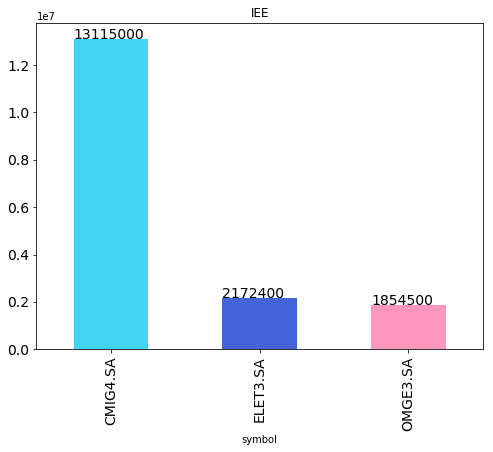

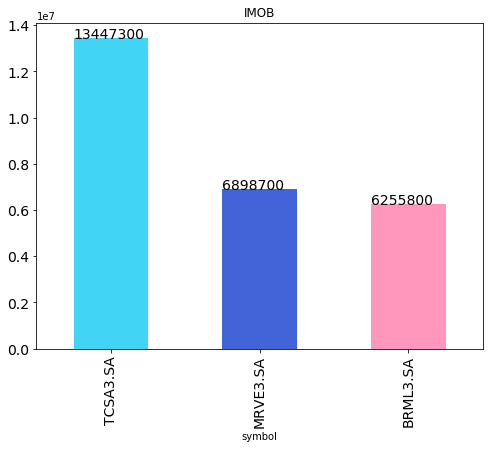

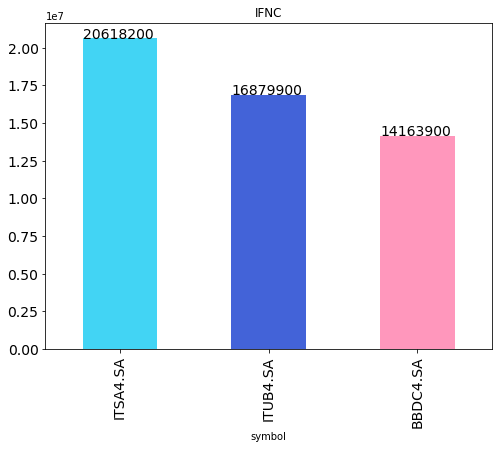

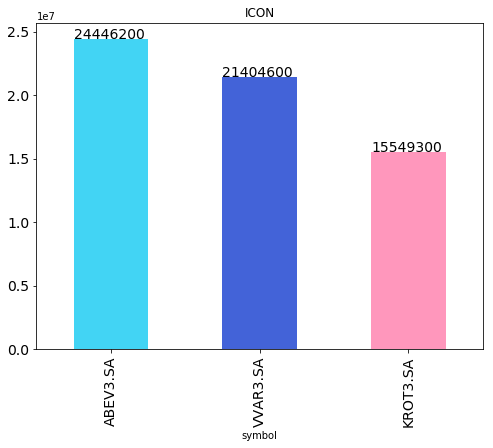

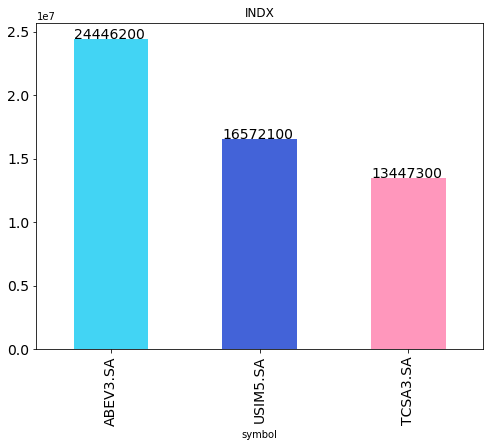

In [138]:
## Imprimindo um gráfico de barras dos papéis para cada índice
colors = ['#42d4f4', '#4363d8', '#FF97BC', '#e6beff']

for chosen_paper in chosen_papers:
  bar = chosen_papers[chosen_paper].plot.bar(x = 'symbol', y = 'volume', color = colors, figsize=(8,6), fontsize=14, title = chosen_paper, legend = False)
  for i in bar.patches:
    bar.text(i.get_x(), i.get_height()+20, \
        str(round((i.get_height()), 2)), fontsize=14)

## 1.2 - Gráficos OHLC dos papéis mais negociados

In [139]:
## Imprimindo gráficos com as cotações diárias nos últimos 24 meses
yf.pdr_override() 
def get_daily_prices(papers):
  paper_prices = []
  for paper in papers:
    dataset = pdr.get_data_yahoo(paper, start="2017-09-10", end="2019-09-10").reset_index()

    fig = go.Figure(data=go.Ohlc
                    (x=dataset['Date'],
                    open=dataset['Open'],
                    high=dataset['High'],
                    low=dataset['Low'],
                    close=dataset['Close']))
    fig.show()
    paper_and_data = (paper, dataset)
    paper_prices.append(paper_and_data)

  return paper_prices

paper_prices = []
for i in range(0, 5):
  print("Gráficos dos papéis do índice ", indexes[i])
  paper_prices = paper_prices + get_daily_prices(most_negotiated_list[indexes[i]])


Gráficos dos papéis do índice  IEE
[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


Gráficos dos papéis do índice  IMOB
[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


Gráficos dos papéis do índice  IFNC
[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


Gráficos dos papéis do índice  ICON
[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


Gráficos dos papéis do índice  INDX
[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


# Questão 2

## 2.1 - Buscandos os retornos de cada um dos ativos e plotando um gráfico do retorno diário de cada um deles


[*********************100%***********************]  13 of 13 downloaded


<Figure size 432x288 with 0 Axes>

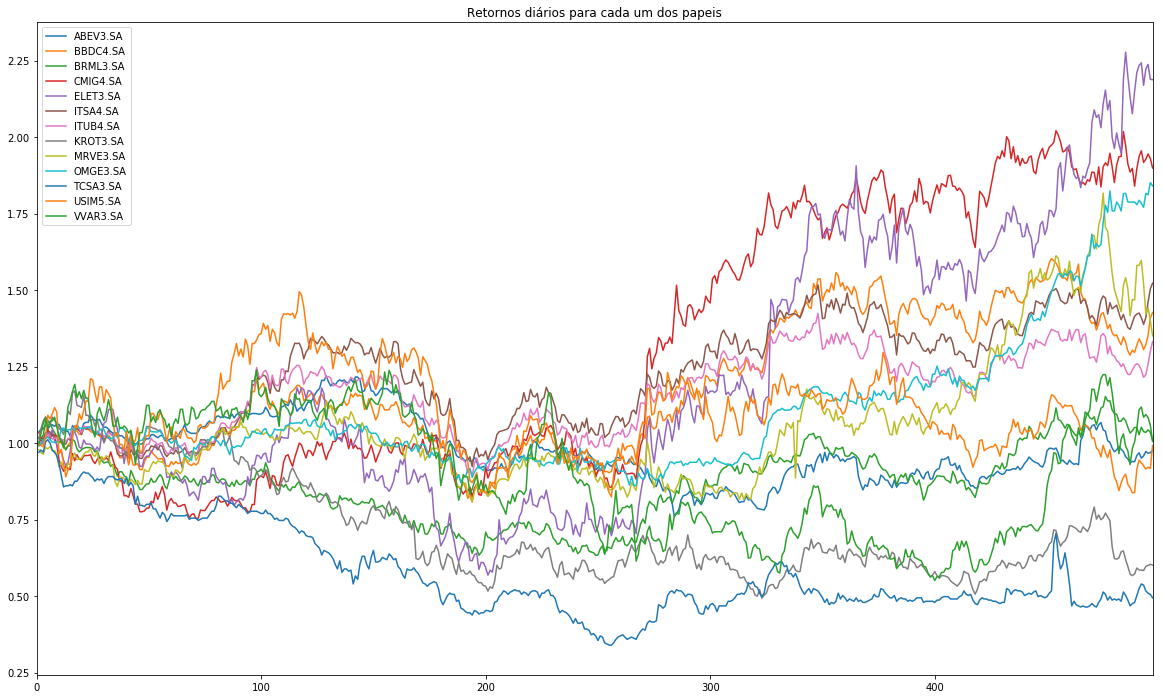

In [140]:
list_of_papers = []

for i in range(0, 5):
  for paper in most_negotiated_list[indexes[i]]:
    list_of_papers.append(paper)
    

def plot_returns(papers):
  papers_data = pdr.get_data_yahoo(papers, start="2017-09-10", end="2019-09-10").reset_index()
  daily_returns = papers_data['Adj Close'].pct_change()
  fig = plt.figure()
  (daily_returns + 1).cumprod().plot(figsize=(20, 12)).set_title("Retornos diários para cada um dos papeis")
  plt.show()
  
  return papers_data

papers_data = plot_returns(list_of_papers)



In [141]:
def get_paper_correlation(paper):
  data = pdr.get_data_yahoo(paper, start="2017-09-10", end="2019-09-10").reset_index()
  daily_returns = data['Adj Close'].pct_change()
  data['Returns'] = daily_returns
  mean_return = daily_returns.mean()
  
  correlations = data[['Returns','Adj Close']].corr()
  correlations = correlations['Returns']['Adj Close']
  
  result = [paper, correlations, mean_return]
  return result

correlations = []
list_of_papers = list(set(list_of_papers))
for paper in list_of_papers:
  correlations.append(get_paper_correlation(paper))
correlations = pd.DataFrame(correlations, columns = ['symbol', 'correlations', 'mean_return'])
correlations.sort_values('correlations', inplace = True)
print('Papéis ordenados pela correlação entre o retorno e o preço diário:')
display(correlations)


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
Papéis ordenados pela correlação entre o retorno e o preço diário:


,symbol,correlations,mean_return
8,TCSA3.SA,0.005328,-0.001012
1,KROT3.SA,0.041219,-0.000627
4,CMIG4.SA,0.042931,0.001576
12,BBDC4.SA,0.051736,0.000888
6,BRML3.SA,0.063815,0.000191
5,ABEV3.SA,0.064709,0.000059
10,ITSA4.SA,0.068708,0.001008
11,VVAR3.SA,0.074592,0.000645
7,ELET3.SA,0.075440,0.002253
3,ITUB4.SA,0.075935,0.000724


In [151]:
## Escolhendo apenas os 5 papeis com menor correlação e retorno médio maior que 0
chosen_papers = []
list_correlations = correlations.values.tolist()
for i in range(0, 14):
  if(list_correlations[i][2] > 0):
    chosen_papers.append(list_correlations[i])
    
    if(len(chosen_papers) == 5):
      break;
chosen_papers = pd.DataFrame(chosen_papers, columns = ['symbol', 'correlations', 'mean_return'])
print('Papéis com menor correlação e retorno médio positivo:')
display(chosen_papers)

Papéis com menor correlação e retorno médio positivo:


,symbol,correlations,mean_return
0,CMIG4.SA,0.042931,0.001576
1,BBDC4.SA,0.051736,0.000888
2,BRML3.SA,0.063815,0.000191
3,ABEV3.SA,0.064709,0.000059
4,ITSA4.SA,0.068708,0.001008


In [152]:
## Questão 3 - Mostrando os valores dos papeis escolhidos usando candlesticks
chosen_papers = chosen_papers.values.tolist()
for chosen_paper in chosen_papers:
  df = pdr.get_data_yahoo(chosen_paper[0], start="2017-09-10", end="2019-09-10").reset_index()
  print('Gráfico candlestick do ativo ' + chosen_paper[0])
  fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                  open=df['Open'],
                  high=df['High'],
                  low=df['Low'],
                  close=df['Close'])])

  fig.show()

[*********************100%***********************]  1 of 1 downloaded
Gráfico candlestick do ativo CMIG4.SA


[*********************100%***********************]  1 of 1 downloaded
Gráfico candlestick do ativo BBDC4.SA


[*********************100%***********************]  1 of 1 downloaded
Gráfico candlestick do ativo BRML3.SA


[*********************100%***********************]  1 of 1 downloaded
Gráfico candlestick do ativo ABEV3.SA


[*********************100%***********************]  1 of 1 downloaded
Gráfico candlestick do ativo ITSA4.SA
